### Problem statement
Leveraging the data of ola, find out which variables are significant in predicting the reason for churning of drivers and make classfier to predict whether a driver will be leaving the company or not based on their attributes

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

from scipy.stats import norm
from scipy.stats import t
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Loading the dataset 
df = pd.read_csv("D:/Scaler/Projects/ola_driver_scaler.csv")

In [3]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


### Missing values check : 

In [4]:
(df.isna().sum()/len(df))*100

Unnamed: 0               0.000000
MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [5]:
df.shape

(19104, 14)

In [6]:
df["Driver_ID"].nunique() 


2381

###### We have 2381 unique drivers data

In [7]:
#We can drop unnamed here
df.drop(["Unnamed: 0"],axis = 1 , inplace=True)
#Replacing 0 with male and 1 with female in gender column
df["Gender"].replace({0.0:"Male",1.0:"Female"},inplace=True)

In [8]:
df.describe()

,Driver_ID,Age,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [9]:
df.describe(include= 'object')

,MMM-YY,Gender,City,Dateofjoining,LastWorkingDate
count,19104,19052,19104,19104,1616
unique,24,2,29,869,493
top,01/01/19,Male,C20,23/07/15,29/07/20
freq,1022,11074,1008,192,70


## Analysing structure of given Data : 

In [10]:
df[df["Driver_ID"]==4]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
5,12/01/19,4,43.0,Male,C13,2,65603,12/07/19,NaN,2,2,0,1
6,01/01/20,4,43.0,Male,C13,2,65603,12/07/19,NaN,2,2,0,1
7,02/01/20,4,43.0,Male,C13,2,65603,12/07/19,NaN,2,2,0,1
8,03/01/20,4,43.0,Male,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,04/01/20,4,43.0,Male,C13,2,65603,12/07/19,27/04/20,2,2,0,1


## Restructuring the data by aggregation : 

In [11]:
agg_df = df.groupby(["Driver_ID"]).aggregate({'MMM-YY':len,
                                     "Age":max,
                                     "City":np.unique,
                                    "Education_Level":max,
                                     "Income":np.mean,
                                     "Dateofjoining":np.unique, 
#                                     "LastWorkingDate":last_value,
                                     "Joining Designation":np.unique,
                                     "Grade": np.mean,
                                    "Total Business Value":sum, 
                                     "Quarterly Rating":np.mean
                                     
                                    })

In [12]:
agg_df = agg_df.reset_index()
agg_df = agg_df.rename(columns={"MMM-YY":"No_of_Records",
                      "Dateofjoining":"Date_of_joining",
                      "Joining Designation":"Joining_Designation",
                      "Total Business Value" : "Total_Business_Value",
                      "Quarterly Rating":"Quarterly_Rating"})


In [13]:
agg_df.head()

,Driver_ID,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0
1,2,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0
2,4,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0
3,5,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.0
4,6,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.6


In [14]:
agg_df = pd.merge(left = df.groupby(["Driver_ID"])["LastWorkingDate"].unique().apply(lambda x:x[-1]),
        right = agg_df,
         on = "Driver_ID",
         how="outer")

In [15]:
agg_df = pd.merge(left = df.groupby(["Driver_ID"])["Gender"].unique().apply(lambda x:x[-1]),
        right = agg_df,
         on = "Driver_ID",
         how="outer")

In [16]:
data = agg_df.copy()

In [17]:
data["Gender"].value_counts()

Male      1380
Female     956
Name: Gender, dtype: int64

### Target variable creation: 

In [18]:
pd.Series(np.where(data["LastWorkingDate"].isna(),0,1)).value_counts()

1    1616
0     765
dtype: int64

In [19]:
data["Churn"] = data["LastWorkingDate"].fillna(0)

In [20]:
def apply_0_1(y):
    if y == 0:
        return 0
    if y != 0:
        return 1

In [21]:
data["Churn"] = data["Churn"].apply(apply_0_1)

In [22]:
data["Churn"].value_counts()

1    1616
0     765
Name: Churn, dtype: int64

In [23]:
data["Churn"].value_counts(normalize=True)*100

1    67.870643
0    32.129357
Name: Churn, dtype: float64

###### class 1 is the driviers who churned 68%. class 0 is the driviers who have not churned 32%. So we can say that Data is imbalanced

#### Converting date columns into Datatime format : 

In [24]:
data["Date_of_joining"] = pd.to_datetime(data["Date_of_joining"])
data["LastWorkingDate"] = pd.to_datetime(data["LastWorkingDate"])

In [25]:
data["joining_Year"] = data["Date_of_joining"].dt.year

### checking for missing values after restructuring : 

In [26]:
(data.isna().sum()/len(data))*100

Driver_ID                0.000000
Gender                   1.889962
LastWorkingDate         32.129357
No_of_Records            0.000000
Age                      0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Date_of_joining          0.000000
Joining_Designation      0.000000
Grade                    0.000000
Total_Business_Value     0.000000
Quarterly_Rating         0.000000
Churn                    0.000000
joining_Year             0.000000
dtype: float64

In [27]:
data["Churn"].value_counts(normalize=True)*100

1    67.870643
0    32.129357
Name: Churn, dtype: float64

## Feature Engineering : 

### whether the quarterly rating has increased for that driver 
- #### for those whose quarterly rating has increased we assign the value 1

   

  

In [28]:
def app_rating_inc(y):
    
    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [29]:
Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(app_rating_inc)

In [30]:
data = pd.merge(left = Quarterly_Rating_increased,
        right = data,
         on = "Driver_ID",
         how="outer"
    )

In [31]:
data["Quarterly_Rating_increased"] = data["Quarterly Rating"]

In [32]:
data.drop(["Quarterly Rating"],axis=1,inplace=True)

### whether the monthly income has increased for that driver - 
- #### for those whose monthly income has increased we assign the value 1

In [33]:
def app_income_inc(y):
    
    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [34]:
data = pd.merge(left = df.groupby("Driver_ID")["Income"].unique().apply(app_income_inc).rename("Increased_Income"),
        right = data,
         on = "Driver_ID",
         how="outer")

In [35]:
data

,Driver_ID,Increased_Income,Gender,LastWorkingDate,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,1,0,Male,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000,1,2018,0
1,2,0,Male,NaT,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000,0,2020,0
2,4,0,Male,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000,1,2019,0
3,5,0,Male,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000,1,2019,0
4,6,0,Female,NaT,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,Male,NaT,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000,0,2015,1
2377,2785,0,Female,2020-10-28,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000,1,2020,0
2378,2786,0,Male,2019-09-22,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667,1,2018,0
2379,2787,0,Female,2019-06-20,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.500000,1,2018,0


In [36]:
data = data.copy()

In [37]:
data["Gender"].replace({"Male":0,
                       "Female":1},inplace=True)

In [38]:
data.drop(["Driver_ID"],axis = 1, inplace=True)

In [39]:
data.isna().sum()

Increased_Income                0
Gender                         45
LastWorkingDate               765
No_of_Records                   0
Age                             0
City                            0
Education_Level                 0
Income                          0
Date_of_joining                 0
Joining_Designation             0
Grade                           0
Total_Business_Value            0
Quarterly_Rating                0
Churn                           0
joining_Year                    0
Quarterly_Rating_increased      0
dtype: int64

In [40]:
data

,Increased_Income,Gender,LastWorkingDate,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,0.0,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000,1,2018,0
1,0,0.0,NaT,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000,0,2020,0
2,0,0.0,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000,1,2019,0
3,0,0.0,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000,1,2019,0
4,0,1.0,NaT,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,NaT,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000,0,2015,1
2377,0,1.0,2020-10-28,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000,1,2020,0
2378,0,0.0,2019-09-22,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667,1,2018,0
2379,0,1.0,2019-06-20,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.500000,1,2018,0


In [41]:
pd.to_datetime("2021-06-01")

Timestamp('2021-06-01 00:00:00')

In [42]:
data["LastWorkingDate"] = data["LastWorkingDate"].fillna(pd.to_datetime("2021-06-01"))

In [43]:
(data["LastWorkingDate"] - data["Date_of_joining"])

0        77 days
1       207 days
2       142 days
3        57 days
4       305 days
          ...   
2376   2056 days
2377     61 days
2378    418 days
2379    334 days
2380    358 days
Length: 2381, dtype: timedelta64[ns]

In [44]:
data["Driver_tenure_days"] = (data["LastWorkingDate"] - data["Date_of_joining"])

In [45]:
data["Driver_tenure_days"] = data["Driver_tenure_days"].dt.days

In [46]:
data.drop(["LastWorkingDate","Date_of_joining"],inplace=True,axis = 1)

In [47]:
data.drop(["Driver_tenure_days"],inplace=True,axis = 1)

In [48]:
data

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,0.0,3,28.0,C23,2,57387.0,1,1.0,1715580,2.000000,1,2018,0
1,0,0.0,2,31.0,C7,2,67016.0,2,2.0,0,1.000000,0,2020,0
2,0,0.0,5,43.0,C13,2,65603.0,2,2.0,350000,1.000000,1,2019,0
3,0,0.0,3,29.0,C9,0,46368.0,1,1.0,120360,1.000000,1,2019,0
4,0,1.0,5,31.0,C11,1,78728.0,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,24,34.0,C24,0,82815.0,2,3.0,21748820,2.625000,0,2015,1
2377,0,1.0,3,34.0,C9,0,12105.0,1,1.0,0,1.000000,1,2020,0
2378,0,0.0,9,45.0,C19,0,35370.0,2,2.0,2815090,1.666667,1,2018,0
2379,0,1.0,6,28.0,C20,2,69498.0,1,1.0,977830,1.500000,1,2018,0


In [49]:
data.columns

Index(['Increased_Income', 'Gender', 'No_of_Records', 'Age', 'City', 'Education_Level', 'Income', 'Joining_Designation', 'Grade', 'Total_Business_Value', 'Quarterly_Rating', 'Churn', 'joining_Year', 'Quarterly_Rating_increased'], dtype='object')

In [50]:
data["Grade"] = np.round(data["Grade"])

In [51]:
data["Quarterly_Rating"]= data["Quarterly_Rating"].round()

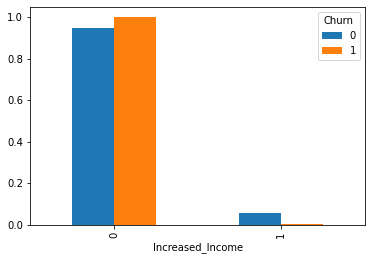

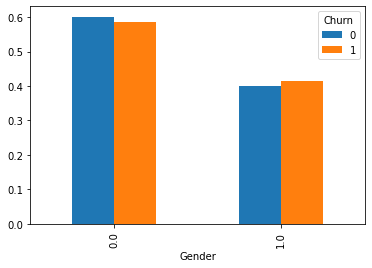

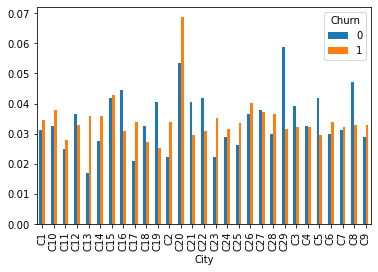

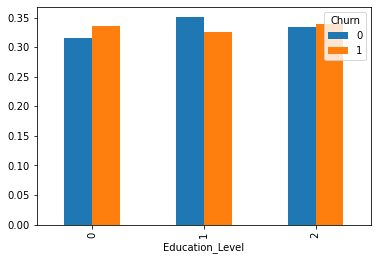

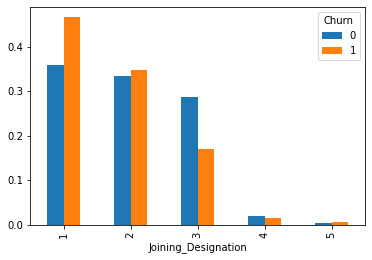

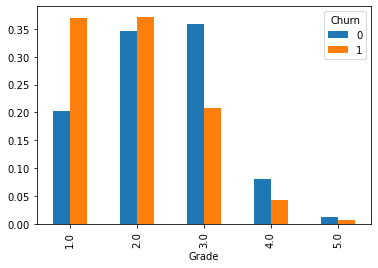

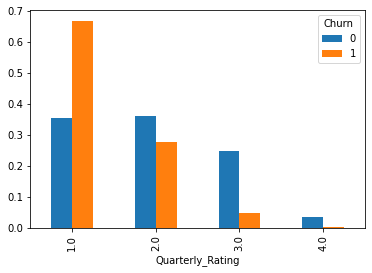

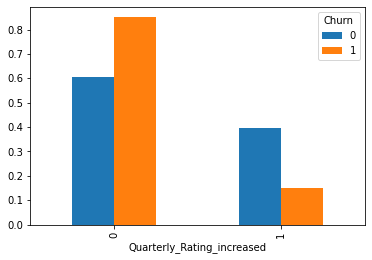

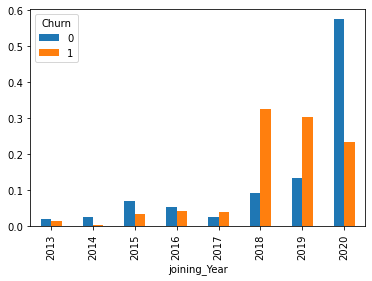

In [52]:
categorical_features = ['Increased_Income', 'Gender','City','Education_Level',
                   'Joining_Designation','Grade','Quarterly_Rating','Quarterly_Rating_increased',"joining_Year"]

for col in categorical_features:
    pd.crosstab(index = data[col],
               columns = data["Churn"],
               normalize="columns").plot(kind = "bar")
    plt.show()

In [53]:
data.isna().sum()

Increased_Income               0
Gender                        45
No_of_Records                  0
Age                            0
City                           0
Education_Level                0
Income                         0
Joining_Designation            0
Grade                          0
Total_Business_Value           0
Quarterly_Rating               0
Churn                          0
joining_Year                   0
Quarterly_Rating_increased     0
dtype: int64

## SimpleImputer

In [54]:
from sklearn.impute import SimpleImputer

In [55]:
imputer = SimpleImputer(strategy='most_frequent')

In [56]:
data["Gender"] = imputer.fit_transform(X=data["Gender"].values.reshape(-1,1),y=data["Churn"].values.reshape(-1,1))

In [57]:
data["Gender"].value_counts(dropna=False)

0.0    1425
1.0     956
Name: Gender, dtype: int64

In [58]:
data.isna().sum()

Increased_Income              0
Gender                        0
No_of_Records                 0
Age                           0
City                          0
Education_Level               0
Income                        0
Joining_Designation           0
Grade                         0
Total_Business_Value          0
Quarterly_Rating              0
Churn                         0
joining_Year                  0
Quarterly_Rating_increased    0
dtype: int64

## TargetEncoder

In [59]:
from category_encoders import TargetEncoder
TE = TargetEncoder()

In [60]:
data["City"] = TE.fit_transform(X = data["City"],y = data["Churn"])



In [61]:
data["joining_Year"] = TE.fit_transform(X = data["joining_Year"],y = data["Churn"])


In [62]:
data

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,0.0,3,28.0,0.769859,2,57387.0,1,1.0,1715580,2.0,1,2018,0
1,0,0.0,2,31.0,0.684190,2,67016.0,2,2.0,0,1.0,0,2020,0
2,0,0.0,5,43.0,0.816064,2,65603.0,2,2.0,350000,1.0,1,2019,0
3,0,0.0,3,29.0,0.706553,0,46368.0,1,1.0,120360,1.0,1,2019,0
4,0,1.0,5,31.0,0.702829,1,78728.0,3,3.0,1265000,2.0,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,24,34.0,0.698531,0,82815.0,2,3.0,21748820,3.0,0,2015,1
2377,0,1.0,3,34.0,0.706553,0,12105.0,1,1.0,0,1.0,1,2020,0
2378,0,0.0,9,45.0,0.570044,0,35370.0,2,2.0,2815090,2.0,1,2018,0
2379,0,1.0,6,28.0,0.730263,2,69498.0,1,1.0,977830,2.0,1,2018,0


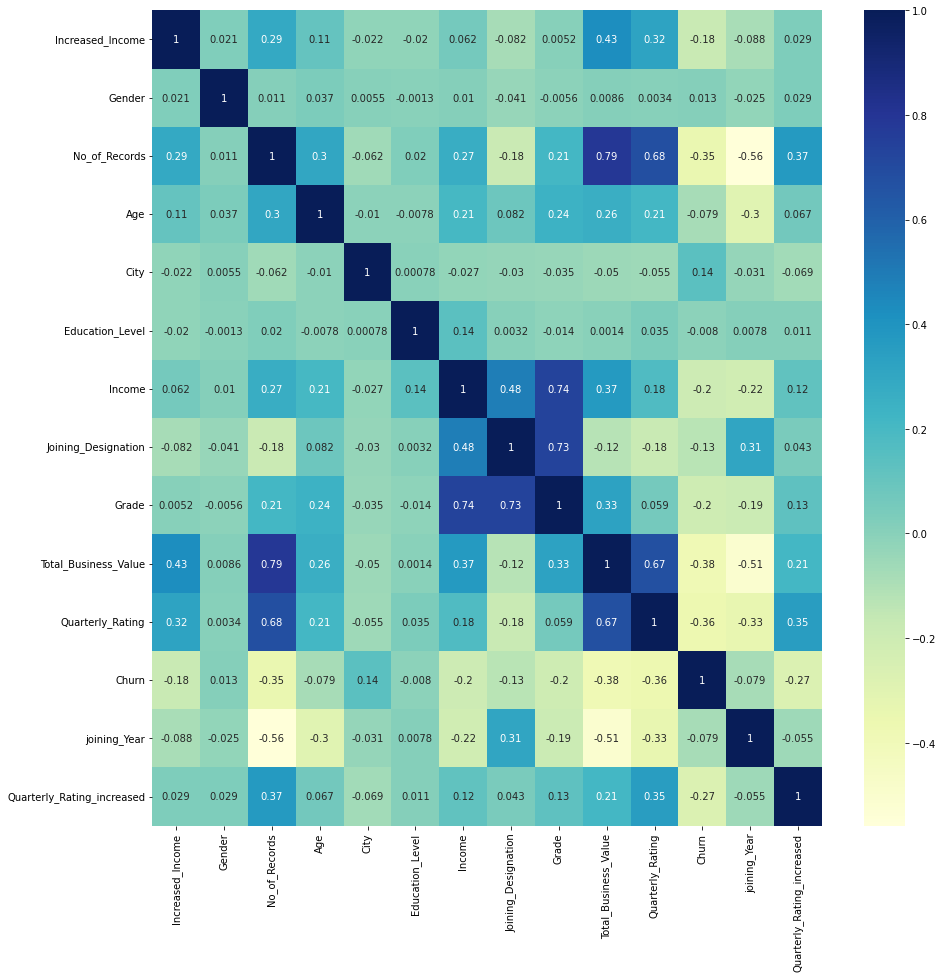

In [63]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu", annot_kws={"size":10})
plt.show()

In [64]:
X = data.drop(["Churn"],axis = 1)
y = data["Churn"]

## KNNImputer

In [65]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)



In [66]:
X = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

In [67]:
X

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,joining_Year,Quarterly_Rating_increased
0,0.0,0.0,3.0,28.0,0.769859,2.0,57387.0,1.0,1.0,1715580.0,2.0,2018.0,0.0
1,0.0,0.0,2.0,31.0,0.684190,2.0,67016.0,2.0,2.0,0.0,1.0,2020.0,0.0
2,0.0,0.0,5.0,43.0,0.816064,2.0,65603.0,2.0,2.0,350000.0,1.0,2019.0,0.0
3,0.0,0.0,3.0,29.0,0.706553,0.0,46368.0,1.0,1.0,120360.0,1.0,2019.0,0.0
4,0.0,1.0,5.0,31.0,0.702829,1.0,78728.0,3.0,3.0,1265000.0,2.0,2020.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,0.0,24.0,34.0,0.698531,0.0,82815.0,2.0,3.0,21748820.0,3.0,2015.0,1.0
2377,0.0,1.0,3.0,34.0,0.706553,0.0,12105.0,1.0,1.0,0.0,1.0,2020.0,0.0
2378,0.0,0.0,9.0,45.0,0.570044,0.0,35370.0,2.0,2.0,2815090.0,2.0,2018.0,0.0
2379,0.0,1.0,6.0,28.0,0.730263,2.0,69498.0,1.0,1.0,977830.0,2.0,2018.0,0.0


In [68]:
X.describe()

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,joining_Year,Quarterly_Rating_increased
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000
mean,0.018480,0.401512,8.02352,33.663167,0.678662,1.00756,59232.460484,1.820244,2.078538,4.586742e+06,1.573289,2018.536329,0.228895
std,0.134706,0.490307,6.78359,5.983375,0.065356,0.81629,28298.214012,0.841433,0.931321,9.127115e+06,0.745987,1.609597,0.420210
min,0.000000,0.000000,1.00000,21.000000,0.531324,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,2013.000000,0.000000
25%,0.000000,0.000000,3.00000,29.000000,0.634237,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,2018.000000,0.000000
50%,0.000000,0.000000,5.00000,33.000000,0.698531,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000,2019.000000,0.000000
75%,0.000000,1.000000,10.00000,37.000000,0.719430,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000,2020.000000,0.000000
max,1.000000,1.000000,24.00000,58.000000,0.816064,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,2020.000000,1.000000


## train_test_split

In [69]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train ,y_test = train_test_split(X,y,
                                                    random_state=5,
                                                    test_size=0.2)

In [70]:
y.value_counts()

1    1616
0     765
Name: Churn, dtype: int64

## StandardScaler

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
scaler.fit(X_train)


StandardScaler()

In [74]:
X_train = scaler.transform(X_train) 
X_test =  scaler.transform(X_test)

## RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight="balanced",
    ccp_alpha=0.0085,
    max_samples=None,)

In [77]:
RF.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced',
                       criterion='entropy', max_depth=10)

In [78]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.8581932773109243, 0.8658280922431866)

In [79]:
RF.feature_importances_

array([8.13520216e-03, 3.17306931e-04, 2.60295582e-01, 1.05965256e-02,
       1.25120210e-02, 1.94962021e-03, 1.92727628e-02, 2.22020355e-02,
       1.58468382e-02, 1.80222802e-01, 9.66162930e-02, 3.18690532e-01,
       5.33424787e-02])

In [80]:
X.columns

Index(['Increased_Income', 'Gender', 'No_of_Records', 'Age', 'City', 'Education_Level', 'Income', 'Joining_Designation', 'Grade', 'Total_Business_Value', 'Quarterly_Rating', 'joining_Year', 'Quarterly_Rating_increased'], dtype='object')

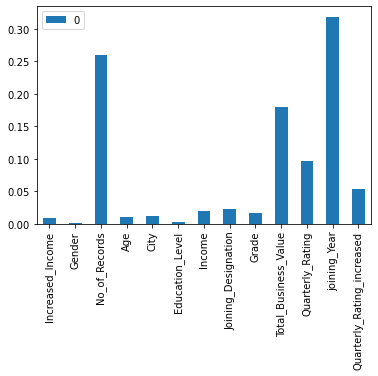

In [81]:
pd.DataFrame(data=RF.feature_importances_,
            index=X.columns).plot(kind="bar")
plt.show()

In [82]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix



In [83]:
confusion_matrix(y_test,RF.predict(X_test) )

array([[152,  10],
       [ 54, 261]], dtype=int64)

In [84]:
confusion_matrix(y_train,RF.predict(X_train) )

array([[ 554,   49],
       [ 221, 1080]], dtype=int64)

In [85]:
f1_score(y_test,RF.predict(X_test)),f1_score(y_train,RF.predict(X_train))

(0.8907849829351536, 0.8888888888888887)

In [86]:
precision_score(y_test,RF.predict(X_test)),precision_score(y_train,RF.predict(X_train))

(0.9630996309963099, 0.9565987599645704)

In [87]:
recall_score(y_test,RF.predict(X_test)),recall_score(y_train,RF.predict(X_train))

(0.8285714285714286, 0.830130668716372)

## GridSearchCV - on RandomForestClassifier

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[7,10,15],
             "n_estimators":[100,200,300,400],
             "max_features":[4,7,10],
             "ccp_alpha":[0.0005,0.00075,0.001]}

RFC = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,                   # need not to train again after grid search
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


In [89]:
grid_search.fit(X_train,y_train.values.ravel())


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0005, 0.00075, 0.001],
                         'max_depth': [7, 10, 15], 'max_features': [4, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [90]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.001, max_depth=10, max_features=7,
                       n_estimators=200)

In [91]:
grid_search.best_score_

0.8876176755508086

In [92]:
grid_search.best_params_

{'ccp_alpha': 0.001, 'max_depth': 10, 'max_features': 7, 'n_estimators': 200}

In [93]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,
    
    class_weight="balanced",
    ccp_alpha=0.0001,
    max_samples=None)

In [94]:
RF.fit(X_train , y_train)

RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=7)

In [95]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.8996848739495799, 0.8805031446540881)

In [96]:
y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)

In [97]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


(0.9076175040518638, 0.9235082098518222)

In [98]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


(0.9271523178807947, 0.9640468227424749)

In [99]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.8888888888888888, 0.8862413528055342)

## BaggingClassifier

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
from sklearn.ensemble import BaggingClassifier

In [102]:
bagging_classifier_model = BaggingClassifier(base_estimator=  DecisionTreeClassifier(max_depth=7,
                                                                                     class_weight="balanced"),
                                            n_estimators=50,
                                            max_samples=1.0,
                                            max_features=1.0,
                                            bootstrap=True,
                                            bootstrap_features=False,
                                            oob_score=False,
                                            warm_start=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0,)

In [103]:
bagging_classifier_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=7),
                  n_estimators=50)

In [104]:

from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix


In [105]:
y_test_pred = bagging_classifier_model.predict(X_test)
y_train_pred = bagging_classifier_model.predict(X_train)

In [106]:

confusion_matrix(y_test,y_test_pred)

array([[142,  20],
       [ 43, 272]], dtype=int64)

In [107]:

confusion_matrix(y_train,y_train_pred)

array([[ 557,   46],
       [ 123, 1178]], dtype=int64)

In [108]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


(0.8962108731466228, 0.933069306930693)

In [109]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


(0.9315068493150684, 0.9624183006535948)

In [110]:

recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.8634920634920635, 0.9054573405073021)

In [111]:
bagging_classifier_model.score(X_test,y_test)

0.8679245283018868

In [112]:
bagging_classifier_model.score(X_train,y_train)

0.9112394957983193

In [116]:
from xgboost import XGBClassifier

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[2,4,6,10],
             "n_estimators":[100,200,300,400]    }


grid_search = GridSearchCV(
    estimator = XGBClassifier(),
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,                   # need not to train again after grid search
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


grid_search.fit(X_train,y_train.values.ravel())

grid_search.best_estimator_

grid_search.best_score_

grid_search.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [118]:
xgb = XGBClassifier(n_estimators=100,
                   max_depth = 2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [119]:
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

In [120]:
confusion_matrix(y_test,y_test_pred)

array([[124,  38],
       [ 24, 291]], dtype=int64)

In [121]:
confusion_matrix(y_train,y_train_pred)

array([[ 515,   88],
       [  76, 1225]], dtype=int64)

In [122]:
xgb.score(X_train,y_train),xgb.score(X_test,y_test)

(0.9138655462184874, 0.870020964360587)

In [123]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


(0.9037267080745341, 0.9372609028309103)

In [124]:

recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.9238095238095239, 0.9415833973866257)

In [125]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


(0.8844984802431611, 0.9329779131759329)

In [126]:
xgb.feature_importances_

array([0.        , 0.01420613, 0.19747032, 0.01697209, 0.02113413,
       0.02173466, 0.01887255, 0.01899261, 0.01514235, 0.04826141,
       0.22931552, 0.3451485 , 0.05274975], dtype=float32)

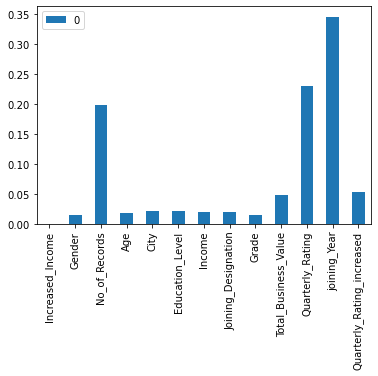

In [127]:
pd.DataFrame(data=xgb.feature_importances_,
            index=X.columns).plot(kind="bar")
plt.show()

## GradientBoostingClassifier

In [128]:
def GradientBoostingClassifier(X, y):
    from sklearn.ensemble import  GradientBoostingClassifier
    from sklearn.metrics import f1_score, accuracy_score , roc_auc_score,auc,recall_score,precision_score
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=1)
    
    lr = GradientBoostingClassifier()
    scaler = StandardScaler()
    scaler.fit(X_train) 
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    prob = lr.predict_proba(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('Train Score : ', lr.score(X_train, y_train), '\n')
    print('Test Score : ', lr.score(X_test, y_test), '\n')
    print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
    print(cm, "---> confusion Matrix ", '\n')
    print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test, prob[:, 1]),'\n')
    print("precision score  test dataset:  ", precision_score(y_test, y_pred),'\n')
    print("Recall score  test dataset:  ", recall_score(y_test, y_pred), '\n')
    print("f1 score  test dataset :  ", f1_score(y_test, y_pred), '\n')
    return (prob[:,1], y_test)

In [129]:
probs , y_test = GradientBoostingClassifier(X,y)

Train Score :  0.914390756302521 

Test Score :  0.8909853249475891 

Accuracy Score :  0.8909853249475891 

[[125  23]
 [ 29 300]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.9450320381171444 

precision score  test dataset:   0.9287925696594427 

Recall score  test dataset:   0.9118541033434651 

f1 score  test dataset :   0.9202453987730062 



In [130]:
def plot_pre_curve(y_test,probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("Precision Recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()
    
def plot_roc(y_test,prob):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

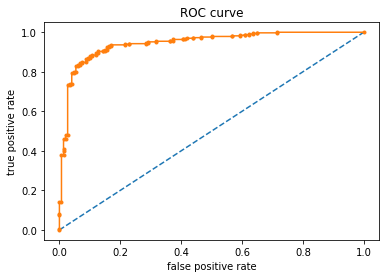

In [131]:
plot_roc(y_test , probs)

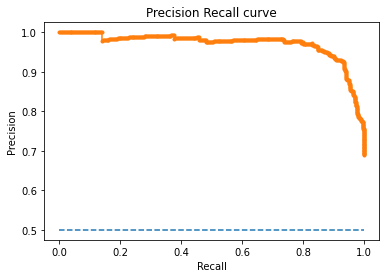

In [132]:
plot_pre_curve(y_test , probs)

# Inferences : 

from data  distribution:
Male      1380
Female     956

Churn : distribution:
1    1616 (67.87%)
0     765 (32.12%)


- Probability of Churn is higher in case of education level 0 and 1 than 2.
- in case of joining designation 1, probability of churn is higher. 



- in case of quarterly rating is 1, probability of churn is significantly higher.
- also same pattern is observed in case of when driver's quarterly rating has increased through out tenure.




- due to some reason , for drivers who joined in 2018 and 2019 , probability of churn is very high compare to 2020 and before 2018.



#### Random Forest : 
- train and test score : (0.8697478991596639, 0.8679245283018868)
- feature importance : highest is : joining year , followed by No of records available in data, and total business value.
- recall : 0.866
- precision: 0.928
- f1-score : 0.89


#### on Grid Search CV : RF : 
- best params : ccp_alpha=0.001, max_depth=10, max_features=7,n_estimators=300
- Gridsearch RF best score : 0.8881417819617973


#### Bagging Classfier : with Decision Tree : 
- with 50 DTs. when max_depth=7, class_weight="balanced"
- f1 score : 0.9064039408866995
- precision : 0.9387755102040817
- recall_score : 0.8761904761904762
- accuracy: 0.880




#### XGBoost Classifier: (Grid SEARCH CV : ) 'max_depth': 2, 'n_estimators': 100
- Accuracy : 0.87
- f1 score : 0.90
- recall : 0.923
- precision : 0.884

- feature importance : highest is : joining year , followed by No of records available in data, and total business value.




#### GradientBoostingClassifier : GBDC:

- Train Score :  0.914390756302521 
- Test Score :  0.8909853249475891 
- Accuracy Score :  0.8909853249475891 
- ROC-AUC score  test dataset:   0.9447855910621867 
- precision score  test dataset:   0.9287925696594427 
- Recall score  test dataset:   0.9118541033434651 
- f1 score  test dataset :   0.9202453987730062 














